In [23]:
import pandas as pd
import category_encoders as ce
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')
from sklearn import preprocessing

In [12]:
df = pd.read_csv('C:\VS Code\heart\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

In [14]:
df['old'] = df['age'].apply(lambda x: 1 if x > 60 else 0)
df['old'].sum()

79

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [16]:
def get_trestbps_mean (x):
    if   x['age'] < 21 and x['sex'] == 1:
        return 123
    elif  x['age'] < 21 and x['sex'] == 0: 
        return 116
    elif x['age'] < 31 and x['sex'] == 1:
        return 126
    elif  x['age'] < 31 and x['sex'] == 0:
        return 120
    elif x['age'] < 41 and x['sex'] == 1:
        return 129
    elif x['age'] < 41 and x['sex'] == 0:
        return 127
    elif x['age'] < 51 and x['sex'] == 1:
        return 135
    elif x['age'] < 51 and x['sex'] == 0:
        return 137
    elif x['age'] < 61 and x['sex'] == 1:
        return 142
    elif x['age'] < 61 and x['sex'] == 0:
        return 144
    elif x['age'] > 60 and x['sex'] == 1:
        return 142
    else:
        return 159

In [17]:
df[['age', 'sex']]

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0
...,...,...
298,57,0
299,45,1
300,68,1
301,57,1


In [18]:
df['trestbps_mean'] = df[['age', 'sex']].apply(get_trestbps_mean, axis=1)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0,142
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,0,144
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,0,135
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0,142
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,0,142


In [19]:
df['trestbps_mean'].iloc[300]

142

In [20]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df[['cp','restecg', 'slope', 'ca', 'thal']])
df = pd.concat([df, type_bin], axis=1)
df.drop(['cp','restecg', 'slope', 'ca', 'thal'], axis=1, inplace= True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


In [22]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.544554,0.260726,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df[['trestbps', 'chol', 'thalach']])
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=['trestbps', 'chol', 'thalach'])
df_r.describe()

,trestbps,chol,thalach
count,303.000000,303.000000,303.000000
mean,0.081188,0.098646,-0.103173
std,0.876907,0.816232,0.704774
min,-1.800000,-1.795276,-2.523077
25%,-0.500000,-0.456693,-0.600000
50%,0.000000,0.000000,0.000000
75%,0.500000,0.543307,0.400000
max,3.500000,5.102362,1.507692


<Axes: >

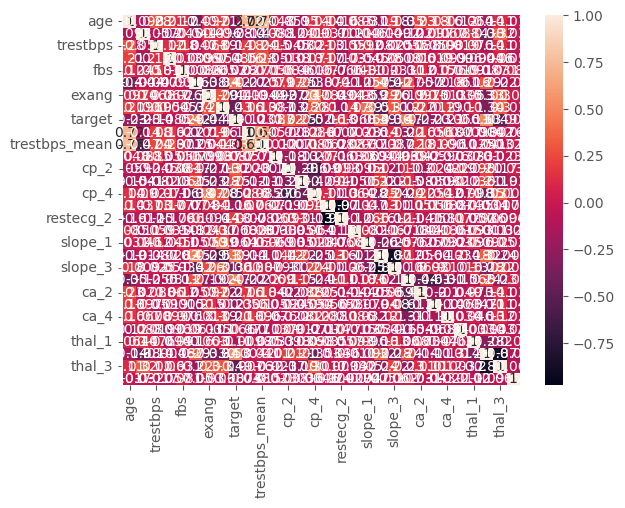

In [26]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [33]:
cr = df.corr(numeric_only=True)

In [28]:
df['age'].corr(df['old'])

0.7180284360485258

In [30]:
df['trestbps_mean'].corr(df['age'])

0.7630547732487203

In [31]:
df['slope_1'].corr(df['slope_3'])

-0.2529037731950231

In [42]:
df['thal_1'].corr(df['thal_2'])


-0.2766352908319754

In [43]:
df['thal_3'].corr(df['thal_4'])

-0.06464995230202873

In [44]:
df['cp_1'].corr(df['ca_1'])

0.06852245153408723

In [45]:
df['cp_1'].corr(df['cp_2'])

-0.18189369824245563

In [46]:
df['thal_3'].corr(df['thal_2'])

-0.8730321138511454

In [47]:
df['restecg_1'].corr(df['restecg_2'])

-0.9739343615465693

In [48]:
df['slope_2'].corr(df['slope_3'])

-0.8703650629236366

In [49]:
df['age'].corr(df['exang'])

0.09680082645526762

In [50]:
df['age'].corr(df['chol'])

0.2136779565595618